# Support Vector Machines

Our next model for predicting the subtypes of breast cance will be Support Vector Machine. Before we train this model, I am going to drop the same columns as before because I think they would cause data leakage. In ordor for SVM to be accurate I will also have to scale the data.

In [16]:
import pandas as pd

In [17]:
data_df = pd.read_csv("data.csv")

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Columns: 20641 entries, RERE to HISTOLOGICAL_SUBTYPE_Unknown
dtypes: bool(23), float64(20609), int64(8), object(1)
memory usage: 310.4+ MB


In [19]:
data_df.head()

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,LATERALITY_Right,LATERALITY_Unknown,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Metaplastic,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform,HISTOLOGICAL_SUBTYPE_Unknown
0,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,False,False,False,False,False,False,False,False,False,False
1,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,5.319857,...,False,False,False,False,False,False,False,False,False,False
2,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,5.254294,...,True,False,False,False,False,False,False,False,False,False
3,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,5.512298,...,True,False,False,False,False,False,False,False,False,False
4,8.736406,6.392422,5.542133,5.184098,8.162845,5.464326,6.105427,5.026018,5.338580,5.430874,...,True,False,False,False,False,False,False,False,False,False


In [20]:
data_df_processed = data_df.copy()

In [21]:
leakage_cols = [
    "OS_MONTHS",
    "OS_STATUS",
    "RFS_MONTHS",
    "RFS_STATUS"
]

data_df_processed = data_df_processed.drop(columns=leakage_cols)

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [27]:
X = data_df_processed.drop(columns=["CLAUDIN_SUBTYPE"], axis=1)
y = data_df_processed["CLAUDIN_SUBTYPE"]

X, y

(          RERE    RNF165      PHF7      CIDEA     TENT2   SLC17A3       SDS  \
 0     8.676978  6.075331  5.838270   6.397503  7.906217  5.702379  6.930741   
 1     9.653589  6.687887  5.600876   5.246319  8.267256  5.521794  6.141689   
 2     9.033589  5.910885  6.030718  10.111816  7.959291  5.689533  6.529312   
 3     8.814855  5.628740  5.849428   6.116868  9.206376  5.439130  6.430102   
 4     8.736406  6.392422  5.542133   5.184098  8.162845  5.464326  6.105427   
 ...        ...       ...       ...        ...       ...       ...       ...   
 1968  9.606915  7.427494  5.927409   5.927031  8.520545  5.550549  5.841476   
 1969  9.049296  6.850000  6.117095   6.374305  8.499637  5.497546  6.351428   
 1970  8.858622  6.550450  5.936371   5.963092  9.320207  5.690297  7.280037   
 1971  8.415867  6.831722  7.408960   9.181768  6.804085  5.730308  7.642485   
 1972  9.902776  7.338318  5.875759   5.596873  8.436732  5.788639  5.977119   
 
       ATP6V1C2        F3    FAM71C  .

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(data_df_processed["CLAUDIN_SUBTYPE"])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
    test_size=0.2, random_state=42, stratify=y_encoded)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
pca = PCA(n_components=300, svd_solver='randomized', random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Here PCA(svd_solver='randomized') is a specialized algorithm for dense matrices (a lot of genes in my case). And instead of looking for all 1500+ components, this algorithm will immediatly focus on the 300.

In [35]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "class_weight": ["balanced", None],
    "loss": ["hinge", "squared_hinge"]
}

In [36]:
grid = GridSearchCV(
    LinearSVC(max_iter=10000, random_state=42),
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

In [38]:
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,LinearSVC(max...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': ['balanced', None], 'loss': ['hinge', 'squared_hinge']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [39]:
print("The best parameters for svm are: ")
grid.best_params_

The best parameters for svm are: 


{'C': 0.01, 'class_weight': None, 'loss': 'squared_hinge'}

In [40]:
y_pred = grid.predict(X_test_pca)

print("Classification report:")
print(classification_report(y_test,y_pred, target_names=label_encoder.classes_))

Classification report:
              precision    recall  f1-score   support

       Basal       0.75      0.71      0.73        42
        Her2       0.74      0.62      0.67        45
        LumA       0.77      0.82      0.80       140
        LumB       0.70      0.79      0.74        95
      Normal       0.69      0.38      0.49        29
 claudin-low       0.71      0.73      0.72        44

    accuracy                           0.74       395
   macro avg       0.73      0.68      0.69       395
weighted avg       0.74      0.74      0.73       395



PCA is mostly the best for reducing dimensionality, but in genetic data it is not very bright. It makes linear combinations of all 20000 genes. I'm next going to use SelectKBest to see if the results are better, because now our baseline model Logistic Regression is by far better than SVM.

In [41]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [44]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(f_classif)),
    ("classifier", SVC(
        kernel="rbf", probability=True, class_weight='balanced', random_state=42
    ))
])

In [49]:
param_grid = {
    "feature_selection__k": [500,800,1000],
    "classifier__C": [0.1, 1, 10],
    "classifier__gamma": ['scale', 0.001, 0.01]
}

In [50]:
grid_svm = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring="f1_weighted"
)

In [51]:
grid_svm.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__C': [0.1, 1, ...], 'classifier__gamma': ['scale', 0.001, ...], 'feature_selection__k': [500, 800, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [58]:
print("Best parameters:")
print(grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

Best parameters:
{'classifier__C': 10, 'classifier__gamma': 'scale', 'feature_selection__k': 1000}


In [59]:
y_pred = best_svm.predict(X_test)
print("Classification Report")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

Classification Report
              precision    recall  f1-score   support

       Basal       0.82      0.88      0.85        42
        Her2       0.84      0.69      0.76        45
        LumA       0.79      0.84      0.81       140
        LumB       0.79      0.85      0.82        95
      Normal       0.70      0.55      0.62        29
 claudin-low       0.90      0.82      0.86        44

    accuracy                           0.81       395
   macro avg       0.81      0.77      0.79       395
weighted avg       0.81      0.81      0.80       395



## Brief Visualizations

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
mask = best_svm.named_steps['feature_selection'].get_support()
selected_genes = X.columns[mask]
selected_genes

NameError: name 'best_svm' is not defined

In [64]:
top_20_genes = selected_genes[:20]
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df['Subtype'] = label_encoder.inverse_transform(y_train_encoded)

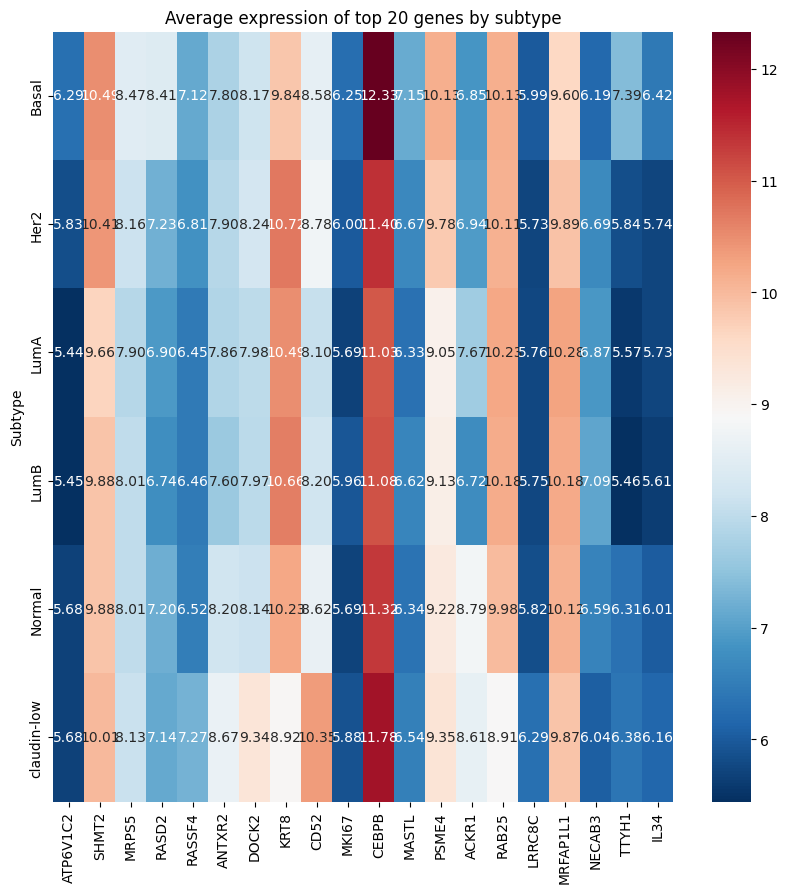

In [72]:
heatmap_data = X_train_df.groupby('Subtype')[top_20_genes].mean()

plt.figure(figsize=(10,10))
sns.heatmap(heatmap_data, cmap='RdBu_r', annot=True, fmt=".2f")
plt.title("Average expression of top 20 genes by subtype")
plt.show()

Here we see the biology in action.

CEBPB and MKI67: I can notice how dark red they are in almost all aggressive subtypes (Basal, LumB). MKI67 is a world-renowned marker for proliferation (cell division). My model correctly identified it as key.

KRT8: I see specific expression in luminal subtypes.

Signal purity: Each column (gene) shows a different “pattern” for the subtypes. This is evidence that SelectKBest did not select duplicates, but rather unique pathways that help the SVM draw nonlinear boundaries.

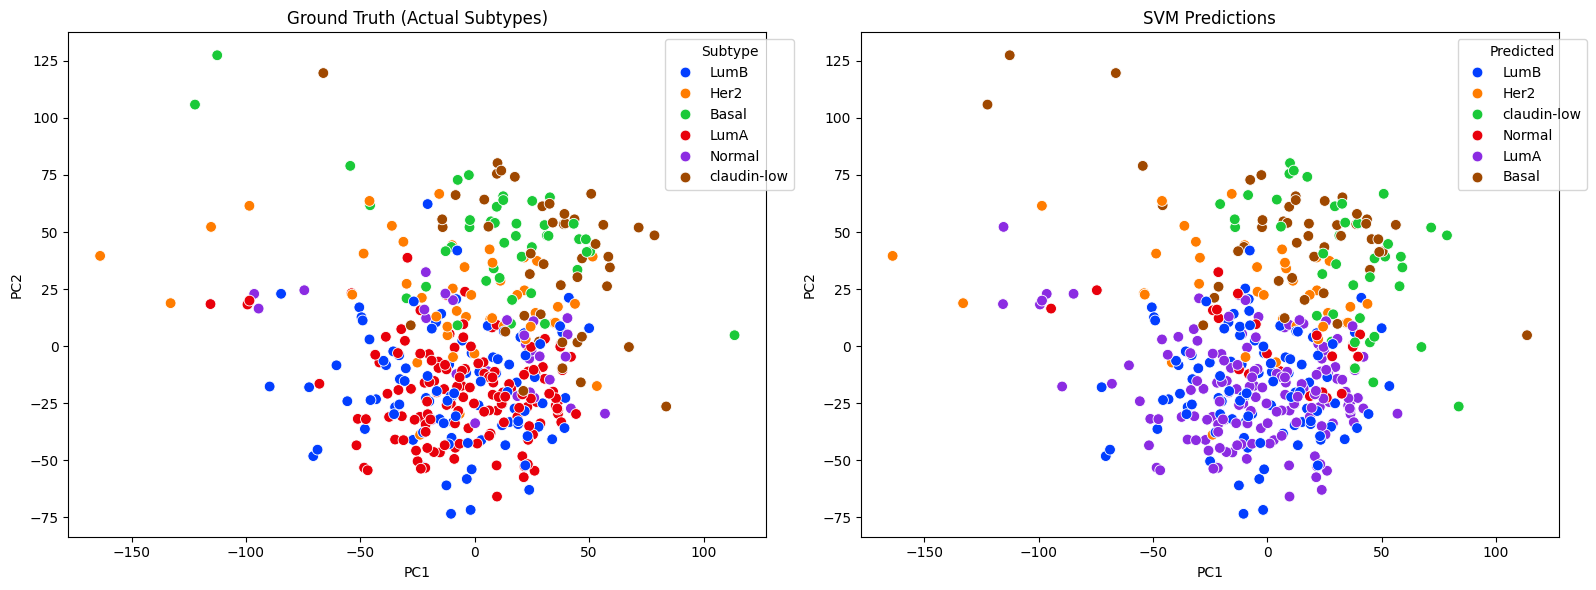

In [75]:
#Scaling and PCA 
scaler_viz = best_svm.named_steps['scaler']
X_test_scaled = scaler_viz.transform(X_test)

pca_2d = PCA(n_components=2)
X_test_pca = pca_2d.fit_transform(X_test_scaled)

plt.figure(figsize=(16, 6))

#Left true labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], 
                hue=label_encoder.inverse_transform(y_test_encoded), palette='bright', s=60)
plt.title("Ground Truth (Actual Subtypes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Subtype", bbox_to_anchor=(1.05, 1))

#Right predicted
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], 
                hue=label_encoder.inverse_transform(y_pred), palette='bright', s=60)
plt.title("SVM Predictions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Predicted", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

This shows how “difficult” the model was in real space.

Clustering: In the left plot (Ground Truth), I see that Basal (green) and Claudin-low (brown) form fairly clear distinct clusters at the top.

Luminal center: LumA (red) and LumB (blue) overlap in the center like a dense cloud. This is biologically expected since they are in the same continuum.

SVM accuracy: In the right plot, I notice how the colors are almost identically distributed as in the left. The SVM was able to “encircle” the true points even in the mixed zones.

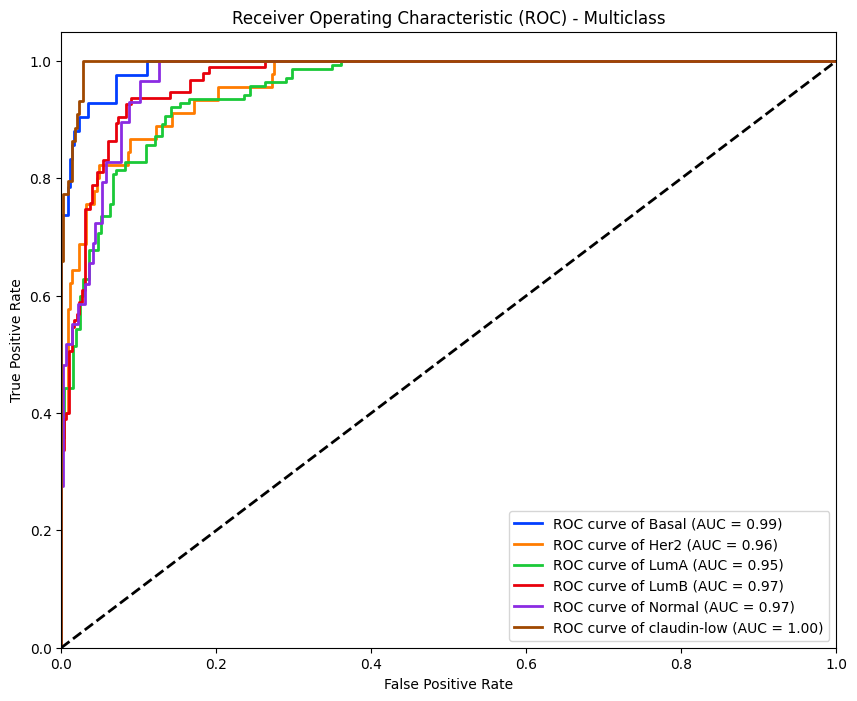

In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# 1. Binaryzation for One-vs-Rest 
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
n_classes = y_test_bin.shape[1]

# 2. Probabilities
y_score = best_svm.predict_proba(X_test)

# 3. ROC AOC for every class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = sns.color_palette('bright', n_classes)

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

This is the most important graph to demonstrate the power of the model.

Perfection for Claudin-low: I have an AUC = 1.00. This means that the model correctly separates Claudin-low from all other subtypes. This is rare and shows that the genes selected by SelectKBest for this subtype are extremely specific.

High confidence: All other curves are in the upper left corner with AUCs between 0.95 and 0.99.

What does this mean? Even where the model makes a mistake in the final predictive class (for example, confusing LumA with LumB), the probability it assigned to the correct class was very close to the winning one. The model is very “smart” and does not make random mistakes.